## Importing libraries

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns  
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split,GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import tensorflow as tf

In [2]:
df = pd.read_csv('laptops.csv')

## Data Cleaning

In [3]:
df.head()

,CompanyName,TypeOfLaptop,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,MSI,Business Laptop,17.040680,IPS Panel Retina Display 2560x1600,Intel Core i7,12GB,512GB SSD,Intel Iris Xe Graphics,Linux,2.064834,35844.099371
1,Chuwi,2 in 1 Convertible,16.542395,Full HD,Intel Core i5,12GB,128GB PCIe SSD,Intel Iris Xe Graphics,No OS,4.060656,37019.059051
2,hp,WorkStation,17.295294,Full HD,Intel Xeon E3-1505M,8GB,1TB HDD,Intel Iris Xe Graphics,Linux,2.901689,33329.360341
3,MSI,2 in 1 Convertible,11.526203,2K,Intel Core i7,16GB,512GB NVMe SSD,Intel Iris Xe Graphics,Windows 10,2.914843,68631.102486
4,Microsoft,Gaming,12.649634,Full HD,Intel Core i5,8GB,512GB SSD,AMD Radeon RX 5600M,Windows 10,4.341995,33842.479566


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CompanyName       1000 non-null   object 
 1   TypeOfLaptop      1000 non-null   object 
 2   Inches            1000 non-null   float64
 3   ScreenResolution  1000 non-null   object 
 4   Cpu               1000 non-null   object 
 5   Ram               1000 non-null   object 
 6   Memory            1000 non-null   object 
 7   Gpu               1000 non-null   object 
 8   OpSys             1000 non-null   object 
 9   Weight            1000 non-null   float64
 10  Price             1000 non-null   float64
dtypes: float64(3), object(8)
memory usage: 86.1+ KB


In [5]:
df.shape

(1000, 11)

In [6]:
df.isna().sum()

CompanyName         0
TypeOfLaptop        0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

## Exploratory Data Analysis (EDA)

In [7]:
df.describe()

,Inches,Weight,Price
count,1000.000000,1000.000000,1000.000000
mean,14.496646,3.469800,51602.255339
std,2.066624,0.857112,13802.833231
min,11.005842,2.000819,30060.275100
25%,12.677791,2.720228,40376.617670
50%,14.509298,3.477824,50683.971717
75%,16.313026,4.189891,61897.280126
max,17.998786,4.994556,115137.368077


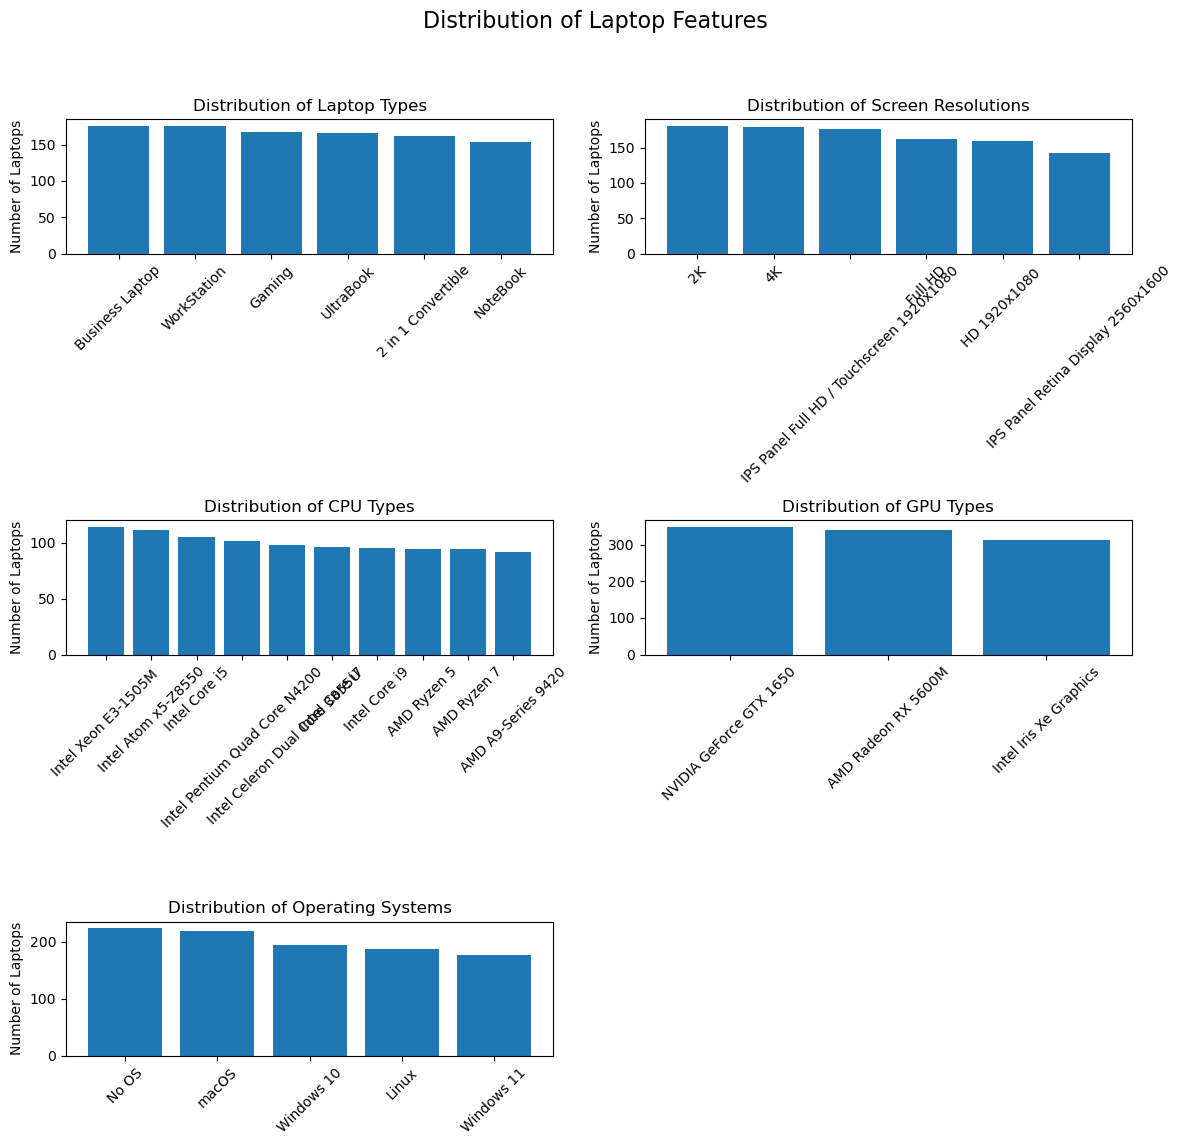

In [8]:
# Type of Laptop
count_type = df['TypeOfLaptop'].value_counts().reset_index()
count_type.columns = ['TypeOfLaptop', 'Count']

# Screen Resolution
resolution = df['ScreenResolution'].value_counts().reset_index()
resolution.columns = ['ScreenResolution', 'Count']

# CPU
cpu = df['Cpu'].value_counts().reset_index()
cpu.columns = ['Cpu', 'Count']

# GPU
gpu = df['Gpu'].value_counts().reset_index()
gpu.columns = ['Gpu', 'Count']

# Operating System
os = df['OpSys'].value_counts().reset_index()
os.columns = ['OpSys', 'Count']

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))
fig.suptitle('Distribution of Laptop Features', fontsize=16)

# Plot 1
axes[0, 0].bar(count_type['TypeOfLaptop'], count_type['Count'])
axes[0, 0].set_title('Distribution of Laptop Types')
axes[0, 0].set_ylabel('Number of Laptops')
axes[0, 0].tick_params(axis='x', rotation=45)

# Plot 2
axes[0, 1].bar(resolution['ScreenResolution'], resolution['Count'])
axes[0, 1].set_title('Distribution of Screen Resolutions')
axes[0, 1].set_ylabel('Number of Laptops')
axes[0, 1].tick_params(axis='x', rotation=45)

# Plot 3
axes[1, 0].bar(cpu['Cpu'], cpu['Count'])
axes[1, 0].set_title('Distribution of CPU Types')
axes[1, 0].set_ylabel('Number of Laptops')
axes[1, 0].tick_params(axis='x', rotation=45)

# Plot 4
axes[1, 1].bar(gpu['Gpu'], gpu['Count'])
axes[1, 1].set_title('Distribution of GPU Types')
axes[1, 1].set_ylabel('Number of Laptops')
axes[1, 1].tick_params(axis='x', rotation=45)

# Plot 5
axes[2, 0].bar(os['OpSys'], os['Count'])
axes[2, 0].set_title('Distribution of Operating Systems')
axes[2, 0].set_ylabel('Number of Laptops')
axes[2, 0].tick_params(axis='x', rotation=45)

# Remove empty subplot in the last row and column
fig.delaxes(axes[2, 1])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Data Visualization

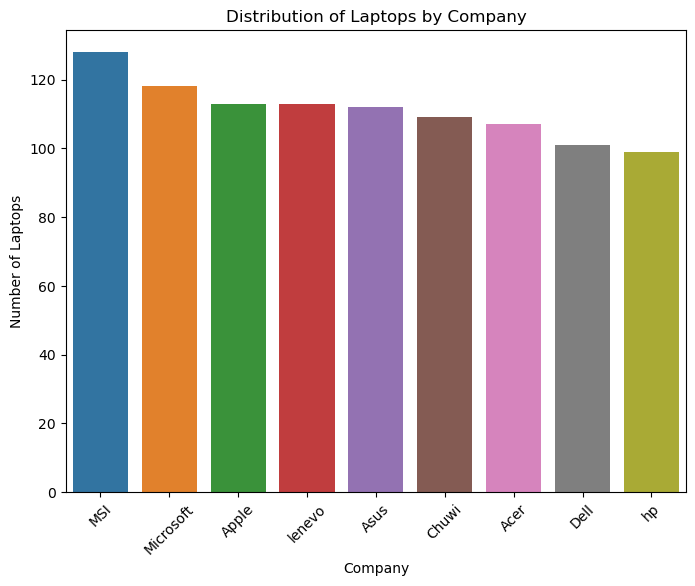

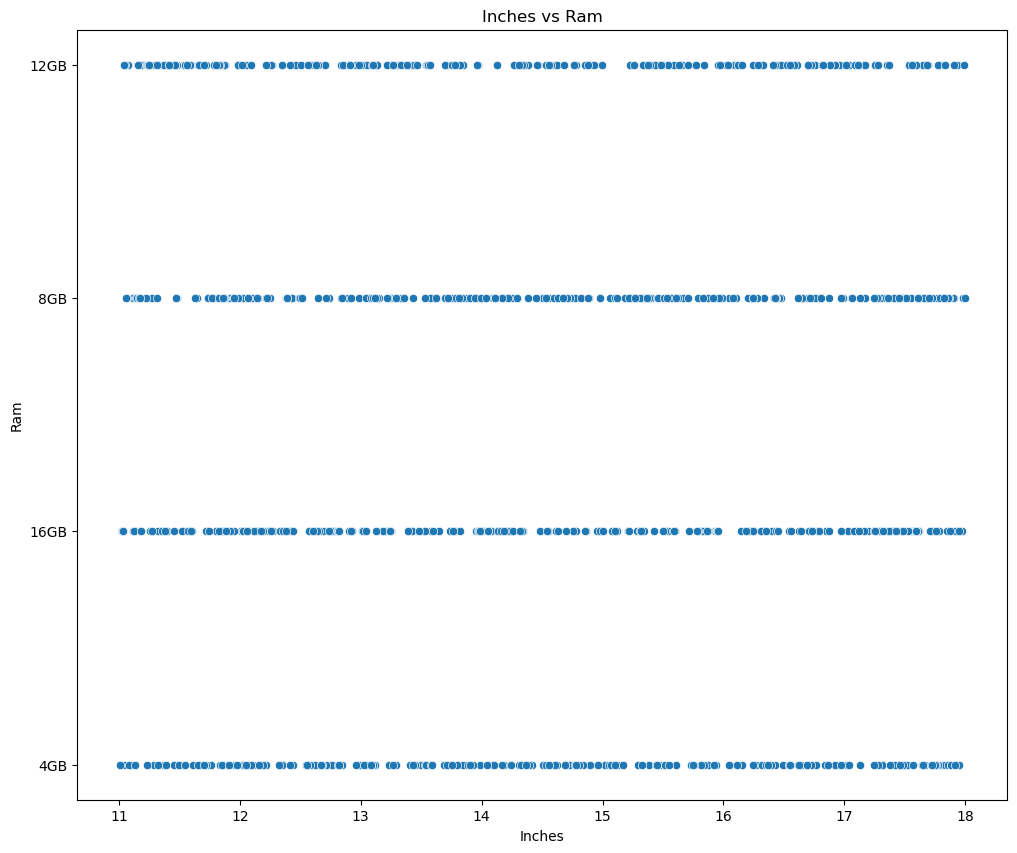

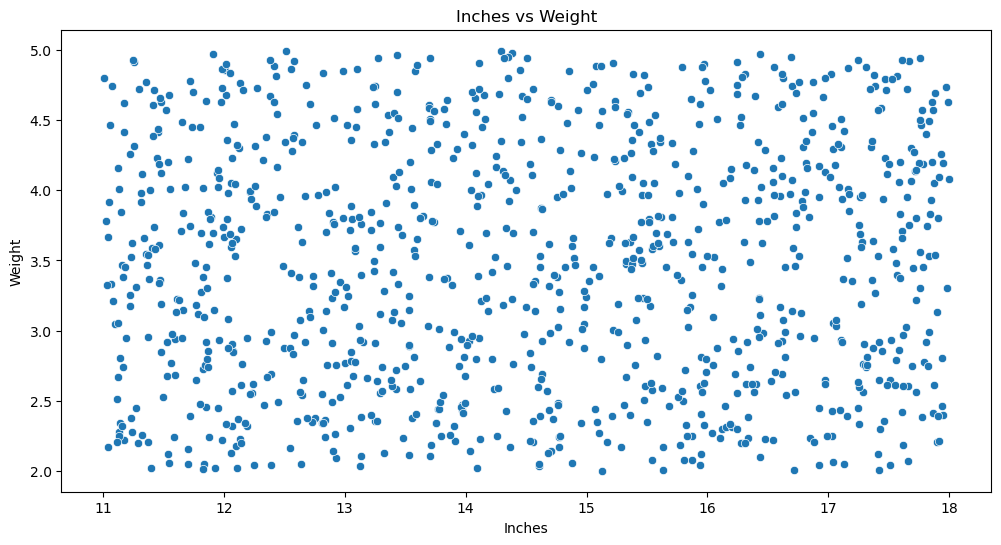

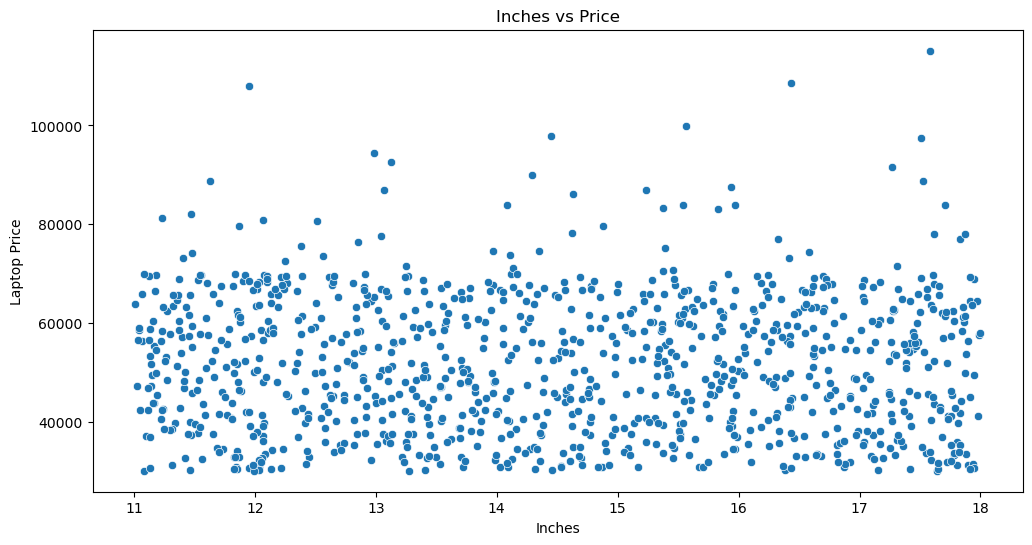

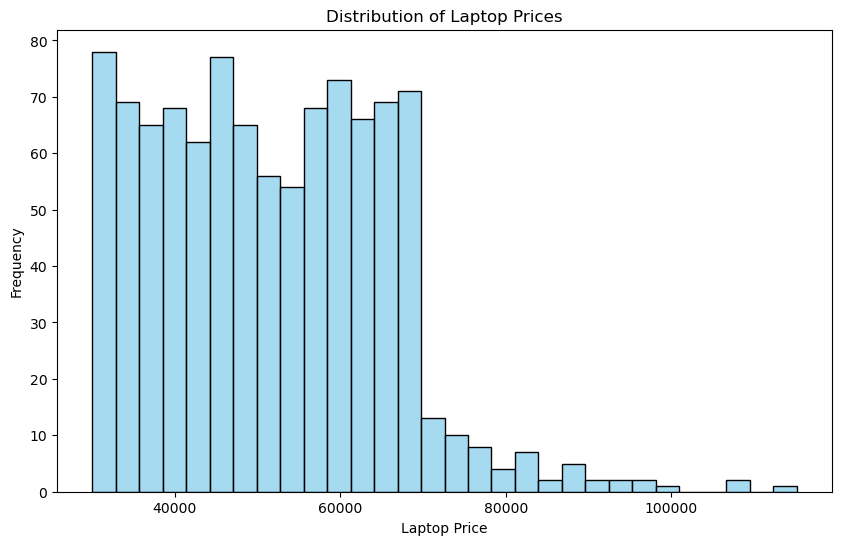

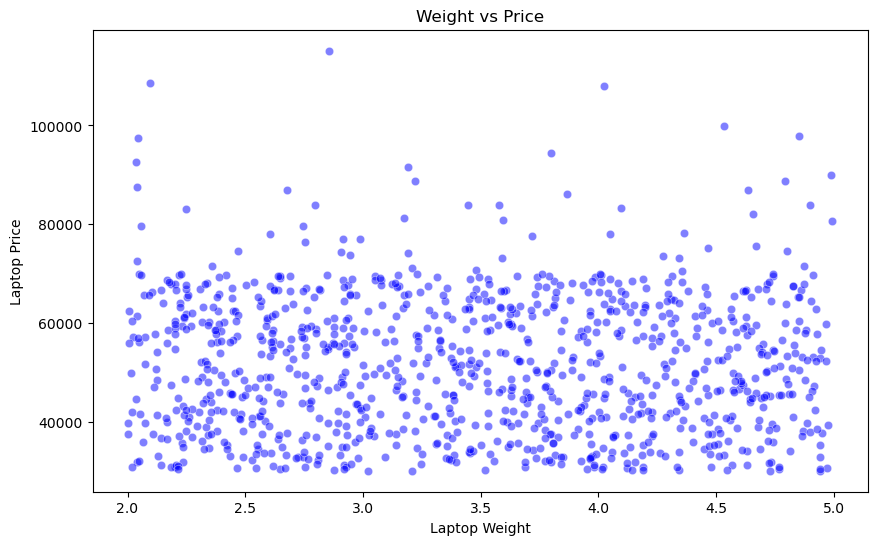

In [9]:
# Plot 1: Company Distribution
company = df['CompanyName'].value_counts().reset_index()
company.columns = ['CompanyName', 'Count']
plt.figure(figsize=(8, 6))
sns.barplot(x='CompanyName', y='Count', data=company)
plt.title('Distribution of Laptops by Company')
plt.xlabel('Company')
plt.ylabel('Number of Laptops')
plt.xticks(rotation=45)
plt.show()

# Plot 2: Scatter Plot Matrix
plt.figure(figsize=(12, 10))
sns.scatterplot(data=df, x='Inches', y='Ram')
plt.title('Inches vs Ram')
plt.xlabel('Inches')
plt.ylabel('Ram')
plt.show()

# Plot 3: Scatter Plot: Inches vs. Weight
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Inches', y='Weight')
plt.title('Inches vs Weight')
plt.xlabel('Inches')
plt.ylabel('Weight')
plt.show()

# Plot 4: Scatter Plot: Inches vs. Price
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Inches', y='Price')
plt.title('Inches vs Price')
plt.xlabel('Inches')
plt.ylabel('Laptop Price')
plt.show()

# Plot 5: Price Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Laptop Prices')
plt.xlabel('Laptop Price')
plt.ylabel('Frequency')
plt.show()

# Plot 6: Scatter Plot: Price vs. Weight
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Weight', y='Price', alpha=0.5, color='blue')
plt.title('Weight vs Price')
plt.xlabel('Laptop Weight')
plt.ylabel('Laptop Price')
plt.show()

In [10]:
df.columns

Index(['CompanyName', 'TypeOfLaptop', 'Inches', 'ScreenResolution', 'Cpu',
       'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

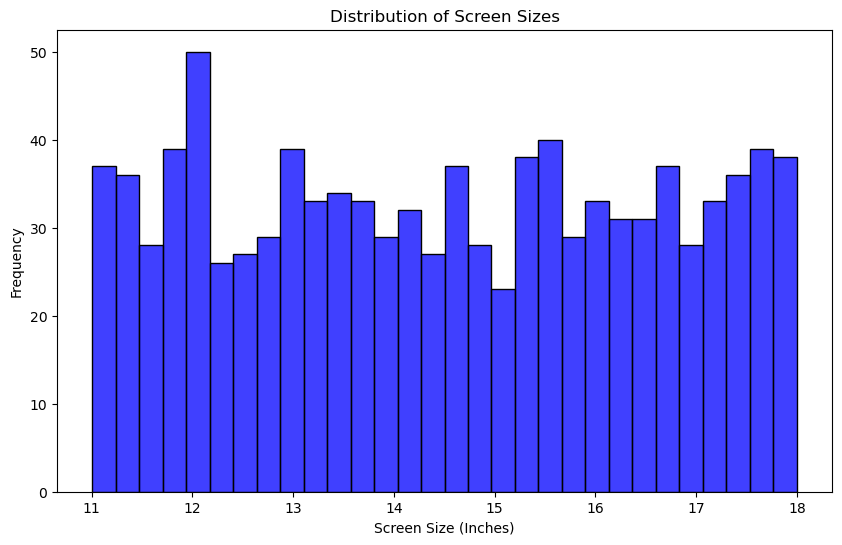

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Inches'], bins=30, color='blue', edgecolor='black')
plt.title('Distribution of Screen Sizes')
plt.xlabel('Screen Size (Inches)')
plt.ylabel('Frequency')
plt.show()

In [12]:
df.columns

Index(['CompanyName', 'TypeOfLaptop', 'Inches', 'ScreenResolution', 'Cpu',
       'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

In [13]:
df_encoded = df.copy()

# List of categorical columns to encode
categorical_columns = ['TypeOfLaptop', 'Cpu', 'OpSys','CompanyName','ScreenResolution','Gpu']

# Apply LabelEncoder to each categorical column
label_encoder = LabelEncoder()
df_encoded[categorical_columns] = df[categorical_columns].apply(label_encoder.fit_transform)

df_encoded[categorical_columns].head()

,TypeOfLaptop,Cpu,OpSys,CompanyName,ScreenResolution,Gpu
0,1,6,0,5,5,1
1,0,5,1,3,2,1
2,5,9,0,7,2,1
3,0,6,2,5,0,1
4,2,5,2,6,2,0


In [14]:
# Convert 'Ram' to numeric
df_encoded['Ram'] = df_encoded['Ram'].astype(str).str.extract('(\d+)').astype(float, errors='ignore')

# Convert 'Memory' to numeric (assuming you want to extract the numeric part)
df_encoded['Memory'] = df_encoded['Memory'].astype(str).str.extract('(\d+)').astype(float)

# Assuming 'df_encoded' includes numerical features you want to normalize
numerical_features = ['Inches', 'Ram', 'Weight', 'Price']  # Update this list

# Create a LabelEncoder for categorical columns
label_encoder = LabelEncoder()

# Apply LabelEncoder to categorical columns
categorical_columns = ['TypeOfLaptop', 'Cpu', 'OpSys']  # Update this list
df_encoded[categorical_columns] = df_encoded[categorical_columns].apply(label_encoder.fit_transform)

# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the numerical features
df_encoded[numerical_features] = scaler.fit_transform(df_encoded[numerical_features])

df_encoded[numerical_features].head()

,Inches,Ram,Weight,Price
0,1.231625,0.467981,-1.640006,-1.142232
1,0.990394,0.467981,0.689702,-1.057065
2,1.354890,-0.438959,-0.663151,-1.324513
3,-1.438060,1.374922,-0.647796,1.234338
4,-0.894181,-0.438959,1.018107,-1.287320


In [15]:
df_encoded.head()

,CompanyName,TypeOfLaptop,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,5,1,1.231625,5,6,0.467981,512.0,1,0,-1.640006,-1.142232
1,3,0,0.990394,2,5,0.467981,128.0,1,1,0.689702,-1.057065
2,7,5,1.354890,2,9,-0.438959,1.0,1,0,-0.663151,-1.324513
3,5,0,-1.438060,0,6,1.374922,512.0,1,2,-0.647796,1.234338
4,6,2,-0.894181,2,5,-0.438959,512.0,0,2,1.018107,-1.287320


In [48]:
X = df_encoded.drop('Price', axis=1).values
y = df_encoded['Price'].values

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
X_train.shape, X_test.shape

((800, 10), (200, 10))

In [51]:
y_train.shape, y_test.shape

((800,), (200,))

In [56]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({
    'Feature': df_encoded.drop('Price', axis=1).columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# # Display the sorted feature importances
# print(feature_importance_df)

top_5_features = feature_importance_df.head(5)
print(top_5_features)

Mean Squared Error: 0.95597229428975
       Feature  Importance
2       Inches    0.190618
9       Weight    0.186257
5          Ram    0.121224
0  CompanyName    0.117833
4          Cpu    0.087967


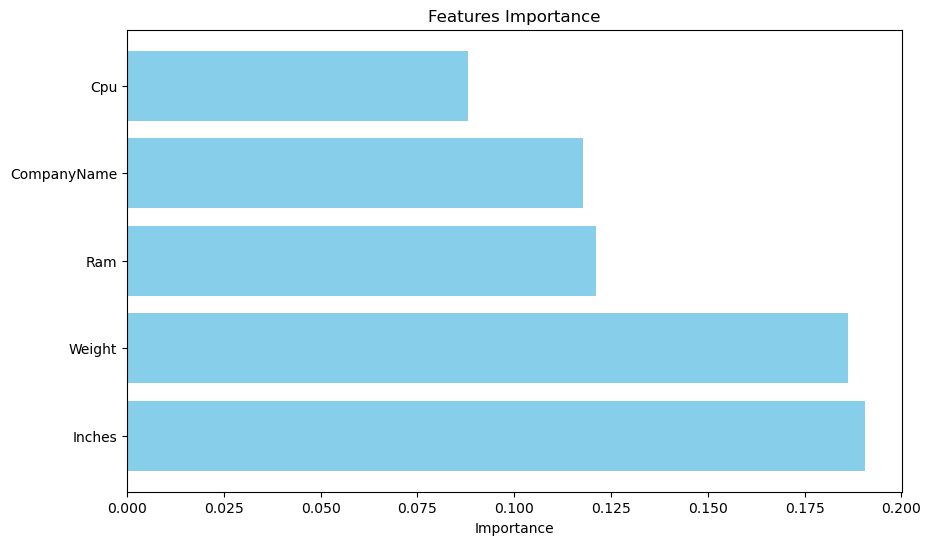

In [57]:
plt.figure(figsize=(10, 6))
plt.barh(top_5_features['Feature'], top_5_features['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title(f'Features Importance')
plt.show()

In [79]:
top_5_features

,Feature,Importance
2,Inches,0.190618
9,Weight,0.186257
5,Ram,0.121224
0,CompanyName,0.117833
4,Cpu,0.087967


In [78]:
df.columns

Index(['CompanyName', 'TypeOfLaptop', 'Inches', 'ScreenResolution', 'Cpu',
       'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

In [85]:
new_df = df_encoded[['CompanyName', 'Inches', 'Cpu',
       'Ram','Weight', 'Price']]

new_df.head()

,CompanyName,Inches,Cpu,Ram,Weight,Price
0,5,1.231625,6,0.467981,-1.640006,-1.142232
1,3,0.990394,5,0.467981,0.689702,-1.057065
2,7,1.354890,9,-0.438959,-0.663151,-1.324513
3,5,-1.438060,6,1.374922,-0.647796,1.234338
4,6,-0.894181,5,-0.438959,1.018107,-1.287320


In [90]:
X1 = new_df.drop('Price', axis=1).values
y1 = new_df['Price'].values

X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [98]:
# Train Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions using the trained Linear Regression model
linear_predictions = linear_model.predict(X_test)

# Evaluate Linear Regression model
linear_mse = mean_squared_error(y_test, linear_predictions)
print(f'Linear Regression Mean Squared Error: {linear_mse}')

Linear Regression Mean Squared Error: 1.080912708259822


In [99]:
new_df.head()

,CompanyName,Inches,Cpu,Ram,Weight,Price
0,5,1.231625,6,0.467981,-1.640006,-1.142232
1,3,0.990394,5,0.467981,0.689702,-1.057065
2,7,1.354890,9,-0.438959,-0.663151,-1.324513
3,5,-1.438060,6,1.374922,-0.647796,1.234338
4,6,-0.894181,5,-0.438959,1.018107,-1.287320


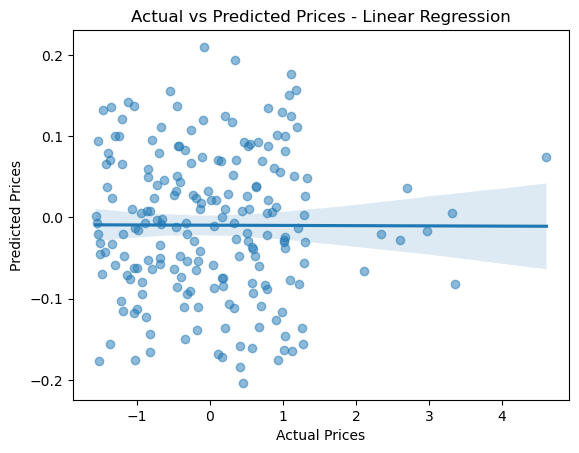

In [100]:
sns.regplot(x=y_test, y=linear_predictions, scatter_kws={'alpha':0.5})
plt.title('Actual vs Predicted Prices - Linear Regression')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

In [59]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [60]:
type(X_train)

numpy.ndarray

In [69]:
X_train.shape

(800, 10)

In [74]:
# # initialise ANN
# ann_model = tf.keras.models.Sequential()

# # adding input and first hidden layer
# ann_model.add(tf.keras.layers.Dense(units=6, activation='relu'))
# ann_model.add(tf.keras.layers.Dense(units=6, activation='relu'))
# ann_model.add(tf.keras.layers.Dense(units=6, activation='relu'))

# # output layer
# ann_model.add(tf.keras.layers.Dense(units=1, activation='linear'))

# # compile ANN
# ann_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])


# Build and train the ANN model
ann_model = tf.keras.models.Sequential()
ann_model.add(tf.keras.layers.Dense(5, activation='relu'))
ann_model.add(tf.keras.layers.Dense(5, activation='relu'))
ann_model.add(tf.keras.layers.Dense(1, activation='linear'))  # Output layer for regression

ann_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [75]:
# training model with train dataset
history = ann_model.fit(X_train, y_train, batch_size=32, epochs=100, validation_data=(X_test,y_test))
history

Epoch 1/100
25/25 [==============================] - 1s 10ms/step - loss: 1.2951 - accuracy: 0.0000e+00 - val_loss: 1.3288 - val_accuracy: 0.0000e+00
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 1.1595 - accuracy: 0.0000e+00 - val_loss: 1.2345 - val_accuracy: 0.0000e+00
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 1.0838 - accuracy: 0.0000e+00 - val_loss: 1.1862 - val_accuracy: 0.0000e+00
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 1.0451 - accuracy: 0.0000e+00 - val_loss: 1.1557 - val_accuracy: 0.0000e+00
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 1.0231 - accuracy: 0.0000e+00 - val_loss: 1.1333 - val_accuracy: 0.0000e+00
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 1.0078 - accuracy: 0.0000e+00 - val_loss: 1.1219 - val_accuracy: 0.0000e+00
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.9982 - accuracy: 0.0000e+00 - 

Epoch 56/100
25/25 [==============================] - 0s 3ms/step - loss: 0.9505 - accuracy: 0.0000e+00 - val_loss: 1.0907 - val_accuracy: 0.0000e+00
Epoch 57/100
25/25 [==============================] - 0s 3ms/step - loss: 0.9503 - accuracy: 0.0000e+00 - val_loss: 1.0916 - val_accuracy: 0.0000e+00
Epoch 58/100
25/25 [==============================] - 0s 3ms/step - loss: 0.9500 - accuracy: 0.0000e+00 - val_loss: 1.0910 - val_accuracy: 0.0000e+00
Epoch 59/100
25/25 [==============================] - 0s 3ms/step - loss: 0.9496 - accuracy: 0.0000e+00 - val_loss: 1.0912 - val_accuracy: 0.0000e+00
Epoch 60/100
25/25 [==============================] - 0s 3ms/step - loss: 0.9495 - accuracy: 0.0000e+00 - val_loss: 1.0921 - val_accuracy: 0.0000e+00
Epoch 61/100
25/25 [==============================] - 0s 3ms/step - loss: 0.9489 - accuracy: 0.0000e+00 - val_loss: 1.0917 - val_accuracy: 0.0000e+00
Epoch 62/100
25/25 [==============================] - 0s 3ms/step - loss: 0.9488 - accuracy: 0.0000e

In [63]:
ann_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               1408      
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 9729 (38.00 KB)
Trainable params: 9729 (38.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


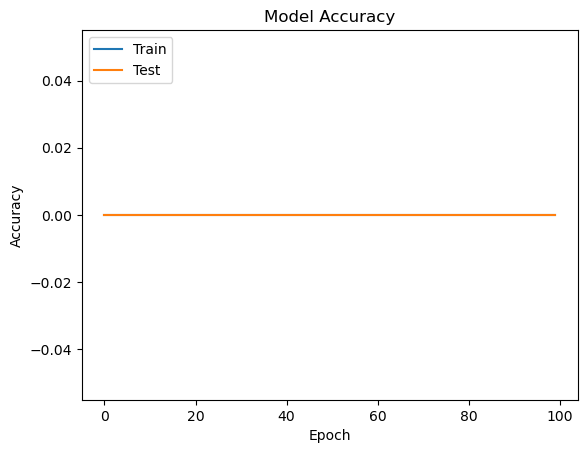

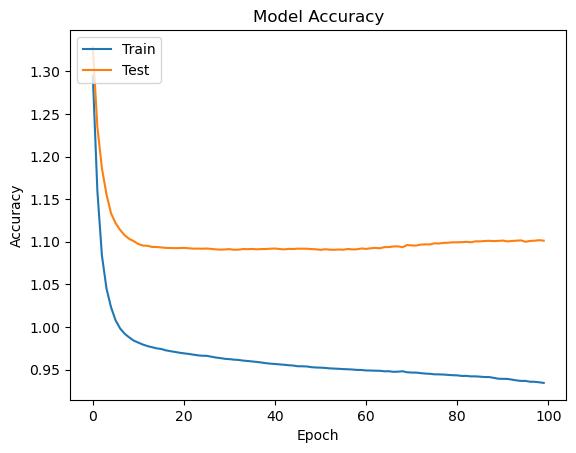

In [76]:
# plot model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()